In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = Z_{n}^(-e^(Z_{n}^p)^(e(Z_{n}^p)^(-e(Z_{n}^p)^(e(Z_{n}^p)^(-e(Z_{n}^p)^(e(Z_{n}^p)^(-e(Z_{n}^p))))))))
\end{eqnarray}""")

<IPython.core.display.Latex object>

# mollusk figure: a numerical oddity.

    Sequential iteration on the complex plane of difference equation:
        Z = Z^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p))))))))
    
    with one parameter:
        p = -0.051448293230 + 0.304348945637i
    produces a shellfish like figure.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [2]:
def starfish_ish_II(Z, p, Z0=None, ET=None):
    """ Z = starfish_ish(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    Z = Z = Z**(-np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p)**(np.exp(Z**p)**(\
                    -np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p))))))))
    return Z

In [3]:
#                                        One of Two parameter sets on this page
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = -0.051448293230+0.304348945637j
list_tuple = [(starfish_ish_II, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

36.36129307746887 	 total time


In [4]:
#                  Escape Time Graphical norm - graphically easier data
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

converstion time =	 1.4311230182647705


coloring time =	 3.588730812072754


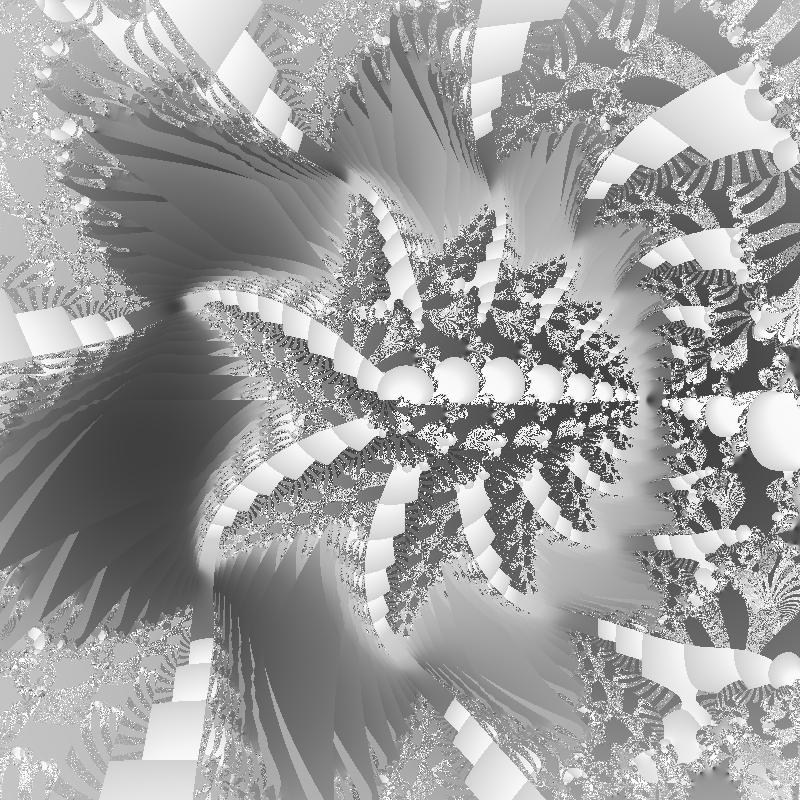

In [7]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 3.5487821102142334


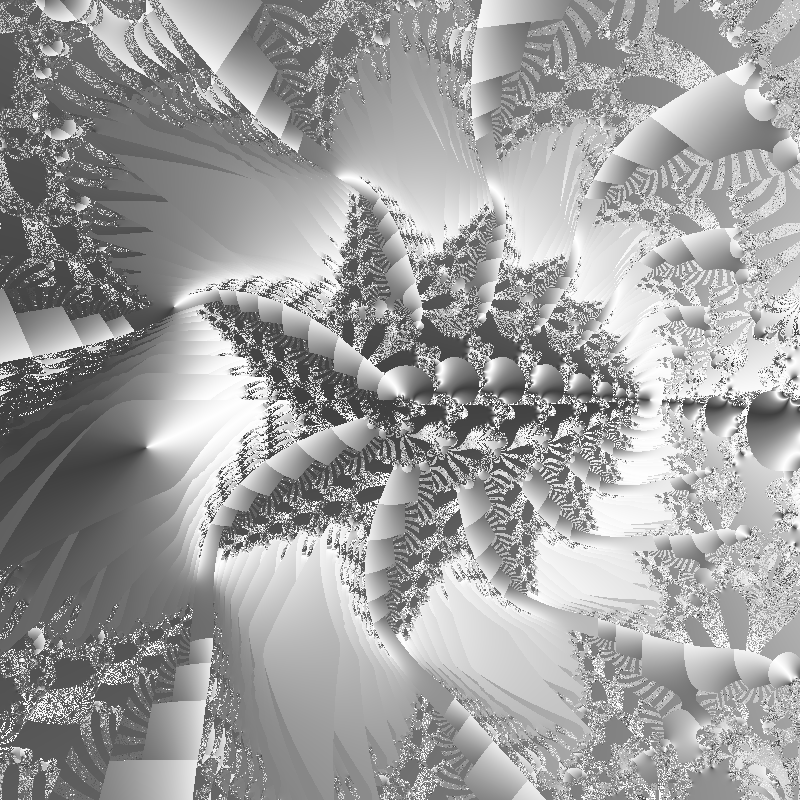

In [8]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 8.302669048309326


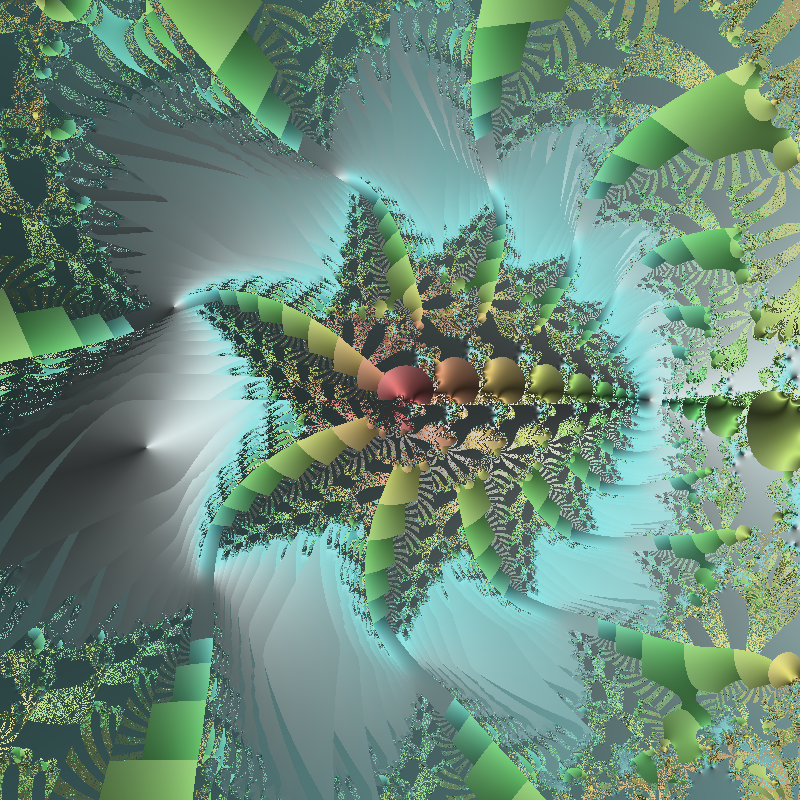

In [5]:
# H = Zr
# S = 1 - ncp.graphic_norm(Zd)
# V = 1 - ncp.graphic_norm(ET)
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = ETn
S = Zd
V = Zr

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

### Same function with different parameters.

In [14]:
#                                        Second of Two parameter sets on this page
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = 0.092988926871+0.463489247762j
list_tuple = [(starfish_ish_II, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

102.41769409179688 	 total time
converstion time =	 1.5569710731506348


coloring time:	 7.99586296081543


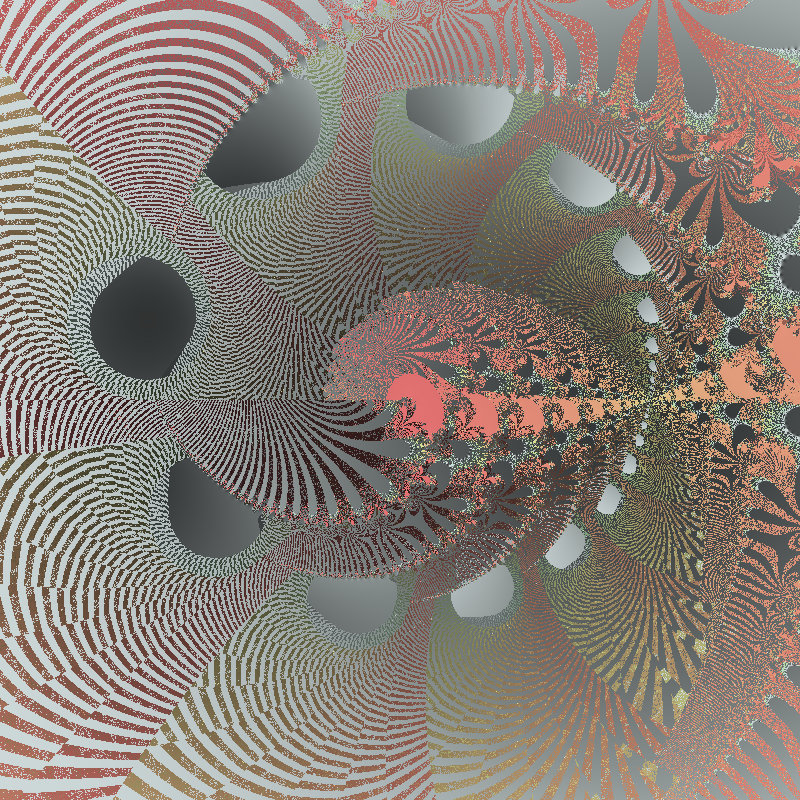

In [24]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = ETn
S = 1 - ETn
V = Zd

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [25]:
#                                        First parameter set again
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = -0.051448293230+0.304348945637j
list_tuple = [(starfish_ish_II, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_zm = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

2.4094300270080566 	 total time


ET =	 1


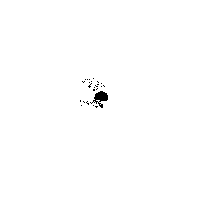

ET =	 2


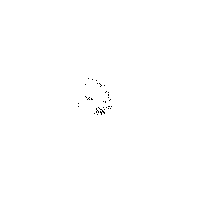

ET =	 3


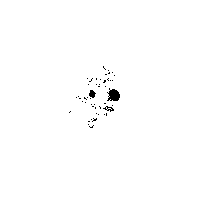

ET =	 4


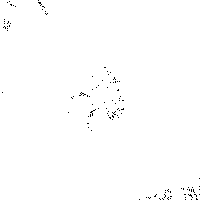

ET =	 5


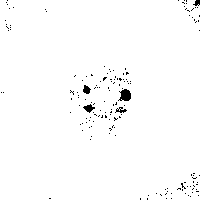

ET =	 6


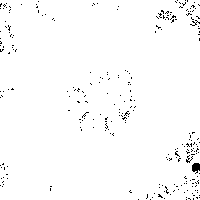

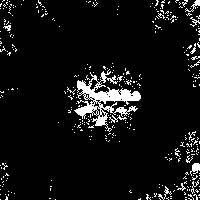

In [26]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [27]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 187
2 64
3 272
4 205
5 544
6 652
7 825
8 1259
9 1055
10 2301
11 988
12 2034
13 776
14 1262
15 540
16 884

How many never escaped:
> 26152


In [28]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('One Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

One Unescaped Vector:
	V =  2.26 135.0 degrees

    26152 total unescaped points

   points near V       (plane units)
    26152 within V/ 1  (2.263)
    26152 within V/ 2  (1.131)
    18957 within V/ 3  (0.754)
    11236 within V/ 4  (0.566)
     7449 within V/ 5  (0.453)
     4813 within V/ 6  (0.377)
     3416 within V/ 7  (0.323)
     2562 within V/ 8  (0.283)
     1994 within V/ 9  (0.251)
     1615 within V/10  (0.226)
     1338 within V/11  (0.206)
